<a href="https://colab.research.google.com/github/mjiii25/prac_class/blob/main/pp_notyet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
import string
from matplotlib import font_manager,rc
import datetime

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

## **서울 구별 클러스터링**

: 구별 위도와 경도 데이터를 사용하여 서울 지역구를 몇 개의 클러스터링으로 구분

In [42]:
Region = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSjRrP9QavqaTMtlu-TAhmiFQvYNd_u5mgE6D6Or69pUk-Okji6pA8jtOKUJ_JjXbC5tQMszqjWPviN/pub?output=csv')
Region

df = Region[['province', 'gu', 'latitude', 'longitude']]
df = df[df.province == '서울']
df = df.drop(index = 0)
df

,province,gu,latitude,longitude
1,서울,중구,37.563750,126.997498
2,서울,용산구,37.532436,126.990257
3,서울,성동구,37.563453,127.036938
4,서울,광진구,37.538537,127.082369
5,서울,동대문구,37.574420,127.039732
6,서울,중랑구,37.606560,127.092622
7,서울,성북구,37.589375,127.016740
8,서울,강북구,37.639773,127.025514
9,서울,도봉구,37.668773,127.047072
10,서울,노원구,37.654108,127.056321


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text

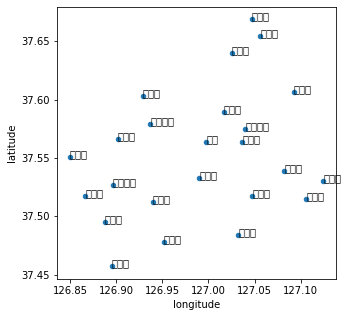

In [43]:
fig, ax = plt.subplots(figsize = (5,5))
df.drop(columns = 'province').plot.scatter(x='longitude', y='latitude', ax=ax)
for ind in df.index:
  ax.annotate(df.loc[ind]['gu'], (df.loc[ind]['longitude'], df.loc[ind]['latitude']))

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 2020).fit(df[['longitude', 'latitude']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [46]:
df['clustering'] = labels
df

,province,gu,latitude,longitude,clustering
1,서울,중구,37.563750,126.997498,2
2,서울,용산구,37.532436,126.990257,2
3,서울,성동구,37.563453,127.036938,2
4,서울,광진구,37.538537,127.082369,0
5,서울,동대문구,37.574420,127.039732,2
6,서울,중랑구,37.606560,127.092622,3
7,서울,성북구,37.589375,127.016740,2
8,서울,강북구,37.639773,127.025514,3
9,서울,도봉구,37.668773,127.047072,3
10,서울,노원구,37.654108,127.056321,3


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text

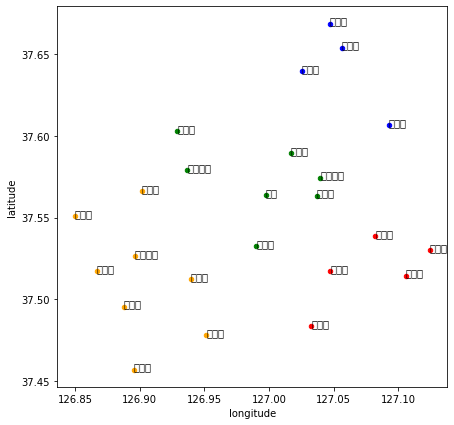

In [49]:
fig, ax = plt.subplots(figsize = (7,7))

df_temp = df[df['clustering'] == 0]
df_temp.plot.scatter(x = 'longitude', y = 'latitude', ax=ax, color = 'Red')

df_temp = df[df['clustering'] == 1]
df_temp.plot.scatter(x = 'longitude', y = 'latitude', ax=ax, color = 'Orange')

df_temp = df[df['clustering'] == 2]
df_temp.plot.scatter(x = 'longitude', y = 'latitude', ax=ax, color = 'Green')

df_temp = df[df['clustering'] == 3]
df_temp.plot.scatter(x = 'longitude', y = 'latitude', ax=ax, color = 'Blue')

for ind in df.index:
  ax.annotate(df.loc[ind]['gu'], (df.loc[ind]['longitude'], df.loc[ind]['latitude']))

In [50]:
df.loc[:, 'clustering'] = df.clustering.replace([0,1,2,3], ['강남구외', '강서구외', '강북구외', '종로구외'])
df

,province,gu,latitude,longitude,clustering
1,서울,중구,37.563750,126.997498,강북구외
2,서울,용산구,37.532436,126.990257,강북구외
3,서울,성동구,37.563453,127.036938,강북구외
4,서울,광진구,37.538537,127.082369,강남구외
5,서울,동대문구,37.574420,127.039732,강북구외
6,서울,중랑구,37.606560,127.092622,종로구외
7,서울,성북구,37.589375,127.016740,강북구외
8,서울,강북구,37.639773,127.025514,종로구외
9,서울,도봉구,37.668773,127.047072,종로구외
10,서울,노원구,37.654108,127.056321,종로구외


In [51]:
Region = df